In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [15]:
### Dataset Load

df = pd.read_csv(r'C:\Users\sures\Documents\Python Training\Test files\Cellphone.csv')

In [16]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Identifying the data patterns

<function matplotlib.pyplot.show(close=None, block=None)>

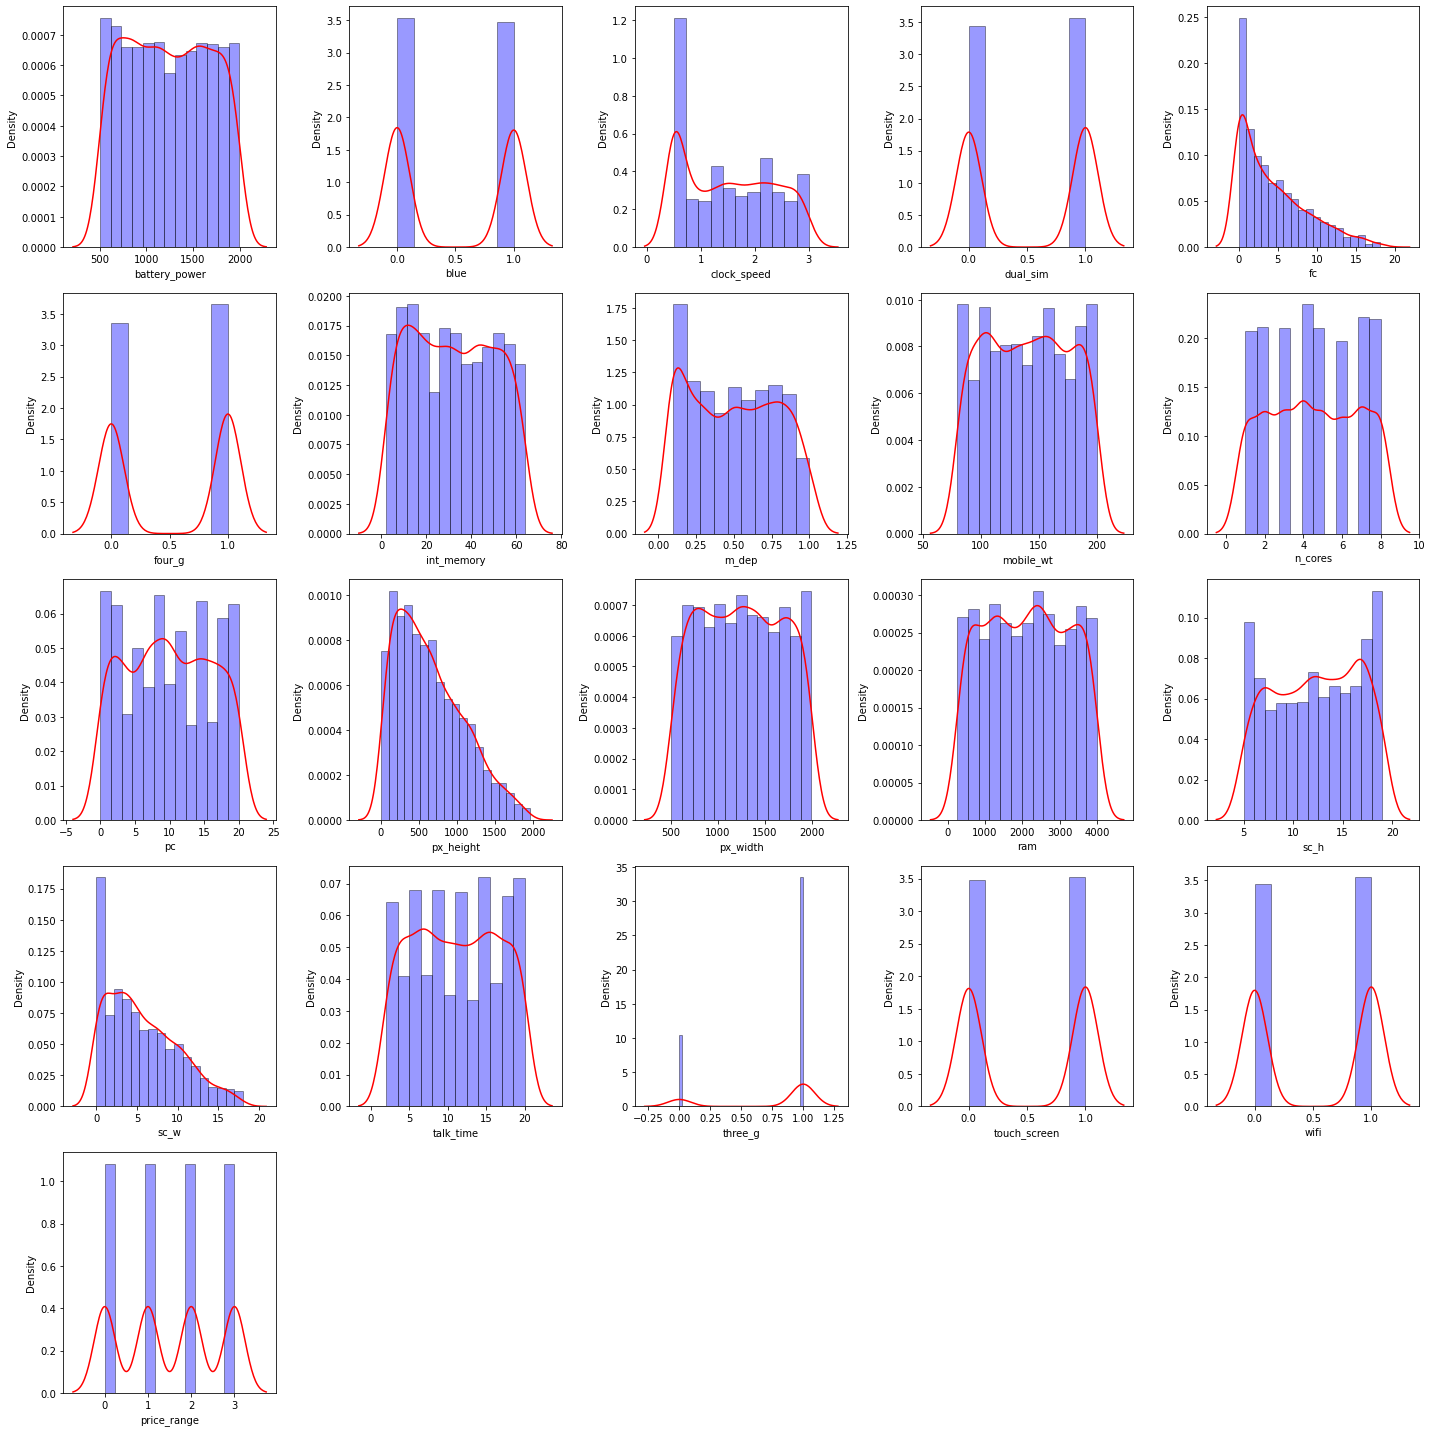

In [33]:
fig = plt.figure(figsize=[20,20])
cols = df.columns
cnt = 1
for col in cols:
    plt.subplot(5,5,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor = "k", linewidth = 1, color = 'blue'), color = 'red')
    cnt+=1
plt.tight_layout()
plt.show

### Possibility of Correlation between multiple features and the price range

<AxesSubplot:>

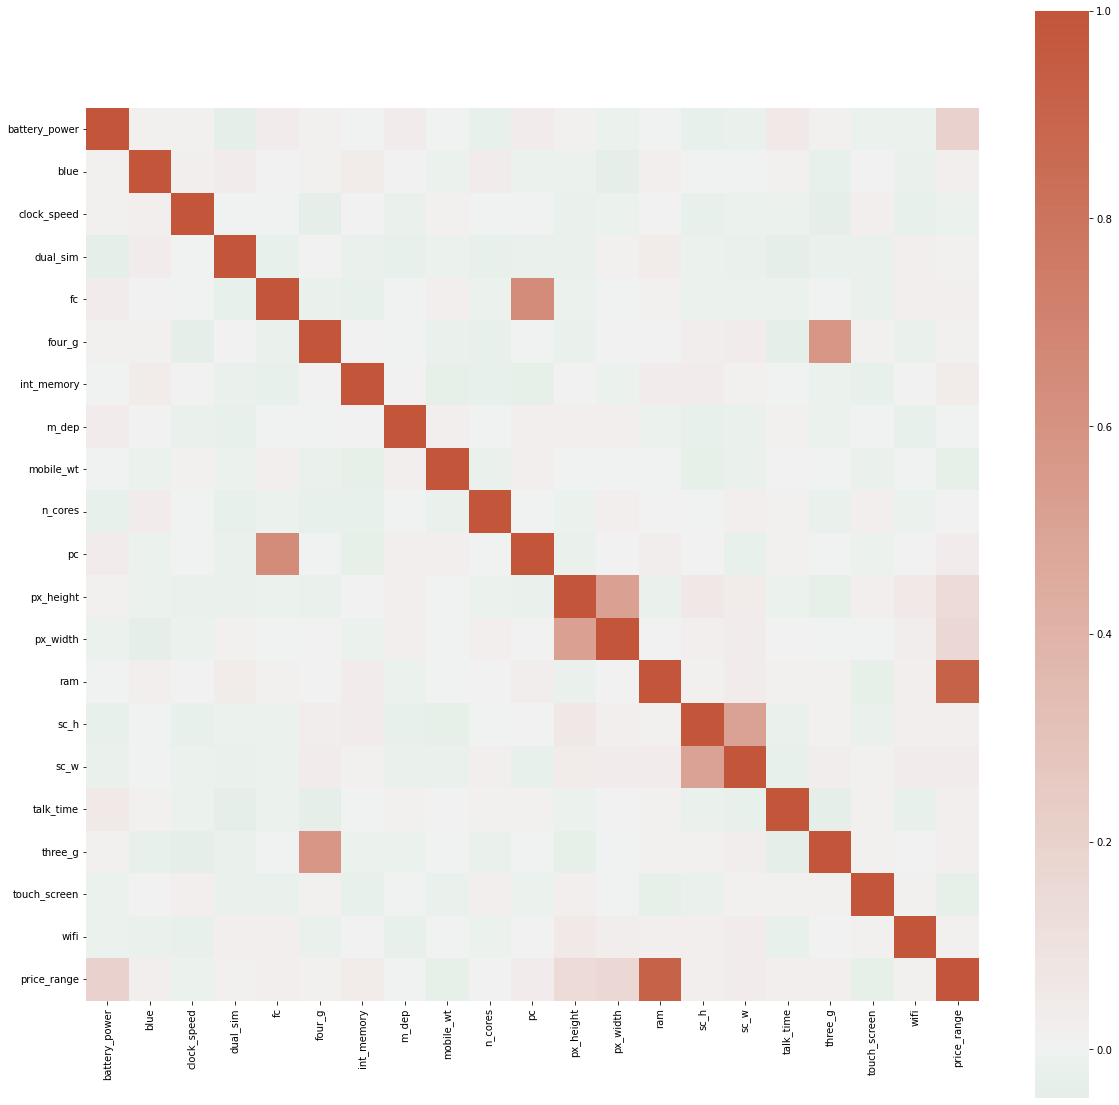

In [36]:
fig = plt.figure(figsize=[20,20])
cmap = sns.diverging_palette(500,20, as_cmap=True)
sns.heatmap(df.corr(),cmap = cmap, center = 0, square = True)

### Identifying the features contributing to the positive impact in price range

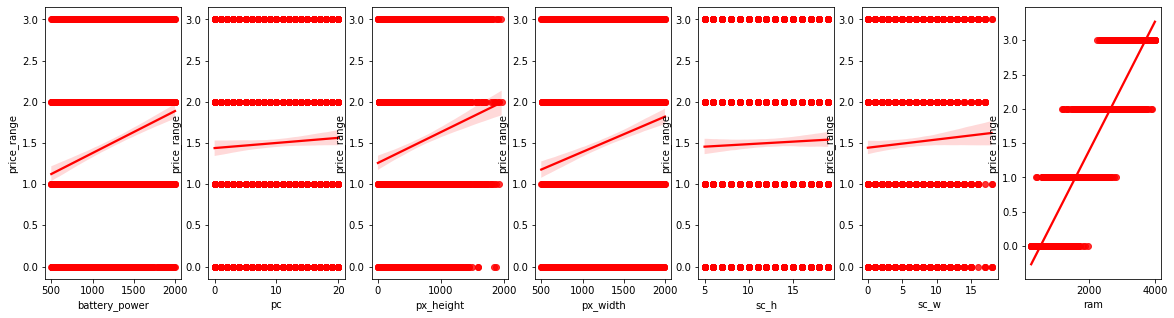

In [43]:
fig, axs = plt.subplots(nrows = 1,  ncols=7, figsize=(20,5))
cols = ['battery_power','pc','px_height','px_width','sc_h','sc_w','ram']
for col,ax in zip(cols, axs.flat):
    sns.regplot(x = df[col], y = df['price_range'], color = 'red', ax=ax)

<function matplotlib.pyplot.show(close=None, block=None)>

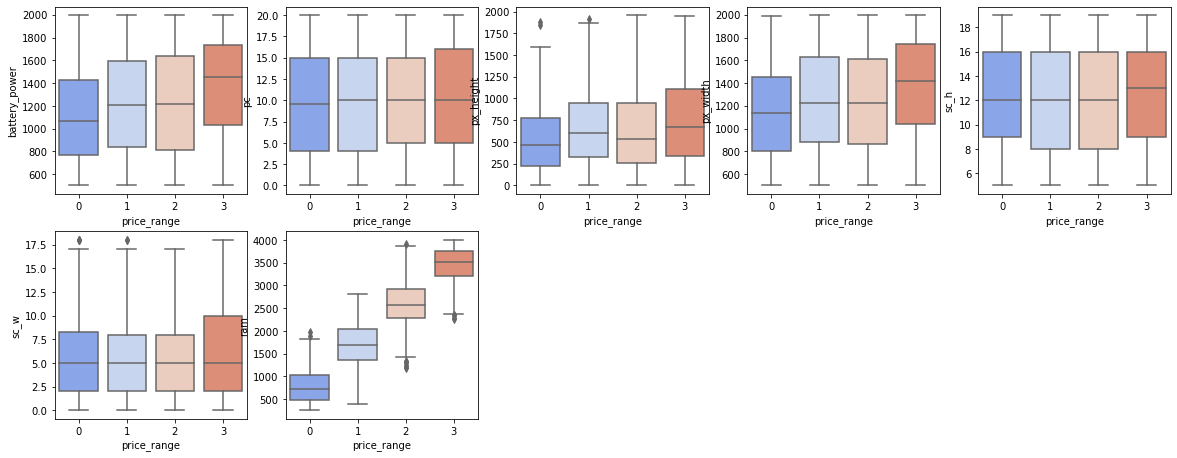

In [44]:
fig = plt.figure(figsize=[20,20])
cols = ['battery_power','pc','px_height','px_width','sc_h','sc_w','ram']
cnt = 1
for col in cols:
    plt.subplot(5,5,cnt)
    sns.boxplot(x = 'price_range', y = col, data = df, palette ='coolwarm')
    cnt = cnt+1
plt.show

### Splitting target value

In [6]:
y = df.pop('price_range')

In [7]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

### Retaining the correlated features in dataset

In [46]:
df = df[['battery_power','pc','px_height','px_width','sc_h','sc_w','ram']]
df

,battery_power,pc,px_height,px_width,sc_h,sc_w,ram
0,842,2,20,756,9,7,2549
1,1021,6,905,1988,17,3,2631
2,563,6,1263,1716,11,2,2603
3,615,9,1216,1786,16,8,2769
4,1821,14,1208,1212,8,2,1411
...,...,...,...,...,...,...,...
1995,794,14,1222,1890,13,4,668
1996,1965,3,915,1965,11,10,2032
1997,1911,3,868,1632,9,1,3057
1998,1512,5,336,670,18,10,869


###  Test Train split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

In [53]:
x_test

,battery_power,pc,px_height,px_width,sc_h,sc_w,ram
1860,1646,5,211,1608,8,6,686
353,1182,16,275,986,19,17,2563
1333,1972,18,293,952,8,1,1316
905,989,19,256,1394,18,7,3892
1289,615,8,1021,1958,14,5,1906
...,...,...,...,...,...,...,...
965,1379,17,387,671,11,2,3912
1284,991,6,1209,1678,11,9,2014
1739,1044,5,1230,1263,18,7,1794
261,728,1,526,1529,5,1,2039


In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Accuracy score baseline:', accuracy_score(y_test, y_pred))

Accuracy score baseline: 0.62


In [62]:
def fit_predict(x_train, x_test, y_train, y_test, scaler, 
                n_neighbours, metric = 'manhattan', weights = 'uniform'):
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)        
    knn = KNeighborsClassifier(n_neighbors=n_neighbours, metric=metric, 
                               weights=weights, n_jobs = 4)
    knn.fit(train_scaled, y_train)
    y_pred = knn.predict(test_scaled)
    print(accuracy_score(y_test, y_pred))

In [50]:
for k in range(1,11):
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(2**k), end = ' ')
    fit_predict(x_train, x_test, y_train, y_test, StandardScaler(), 2**k)

Accuracy score on kNN using n_neighbours = 2: 0.705
Accuracy score on kNN using n_neighbours = 4: 0.7825
Accuracy score on kNN using n_neighbours = 8: 0.8425
Accuracy score on kNN using n_neighbours = 16: 0.8325
Accuracy score on kNN using n_neighbours = 32: 0.87
Accuracy score on kNN using n_neighbours = 64: 0.87
Accuracy score on kNN using n_neighbours = 128: 0.875
Accuracy score on kNN using n_neighbours = 256: 0.8525
Accuracy score on kNN using n_neighbours = 512: 0.825
Accuracy score on kNN using n_neighbours = 1024: 0.78


In [59]:
k=8
for metric in ['euclidean', 'cosine', 'manhattan', 'chebyshev']:
    print('Accuracy score on kNN using {} metric and {} neighbours:'.format(metric,k), end = ' ')
    fit_predict(x_train, x_test, y_train, y_test, StandardScaler(), 2, metric)

Accuracy score on kNN using euclidean metric and 8 neighbours: 0.7175
Accuracy score on kNN using cosine metric and 8 neighbours: 0.7275
Accuracy score on kNN using manhattan metric and 8 neighbours: 0.705
Accuracy score on kNN using chebyshev metric and 8 neighbours: 0.6725


In [60]:
for weights in ['uniform', 'distance']:
    print('Accuracy score on kNN using weights = {0}:'.format(weights), end = ' ')
    fit_predict(x_train, x_test, y_train, y_test, StandardScaler(), 2, 'cosine', weights = weights)

Accuracy score on kNN using weights = uniform: 0.7275
Accuracy score on kNN using weights = distance: 0.725


### Testing data

In [54]:
test = pd.DataFrame({'battery_power':[500], 'pc':[2], 'px_height':[5000], 'px_width':[1500], 'sc_h':[5],'sc_w':[1],'ram':[500]})

In [56]:
y_pred = lr.predict(test)
y_pred

array([3], dtype=int64)